In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import optuna
import keras.backend as Ks
import keras
from keras.models import load_model 
from keras.models import Sequential, Model
from keras import layers 
from keras import Input
from keras import regularizers
from keras.utils import np_utils
import pickle, glob, os
import random, secrets, glob, csv, pandas
import scipy.signal
import tensorflow as tf

from secrets import randbelow as rb
from scipy.optimize import curve_fit as cf
from numpy import load, asarray, savez_compressed, save, savetxt

Using TensorFlow backend.


In [2]:
## file processing from Kim

dir = "pythonread/"
path_list = glob.glob(dir + '/*.txt')     # 指定されたディレクトリ内の全てのcsvファイルをリストとして取得
buf = []
# ファイルを順に開き、timeとcountを取得し、DataFrame(df0)に追加

filename = os.listdir(dir)

# The sequence is as below !!!

Co = np.loadtxt(dir+"Co-Efit.txt")
Cs = np.loadtxt(dir+"Cs-Efit.txt")
Na = np.loadtxt(dir+"Na-Efit.txt")
Ba = np.loadtxt(dir+"Ba-Efit.txt")
Eu = np.loadtxt(dir+"Eu-Efit.txt")
U235=np.loadtxt(dir+"U235-Efit.txt")
U238=np.loadtxt(dir+"U238-Efit.txt")
Th = np.loadtxt(dir+"Th-Efit.txt")
Ra = np.loadtxt(dir+"Ra-Efit.txt")
K  = np.loadtxt(dir+"K-Efit.txt")

nuclides = [Co, Cs, Na, Ba, Eu, U235, U238, Th, Ra, K]
nuclides_n = len(nuclides)
print("Number of nuclides = ",nuclides_n)

rng = secrets.SystemRandom()

Co = Co.T
Cs = Cs.T
Na = Na.T
Ba = Ba.T
Eu = Eu.T
U235=U235.T
U238=U238.T
Th = Th.T
Ra = Ra.T
K  = K.T

# print(Co[1,:])

TotBq = []
Co_Bq = []
Cs_Bq = []
Na_Bq = []
Ba_Bq = []
Eu_Bq = []
U235_Bq=[]
U238_Bq=[]
Th_Bq = []
Ra_Bq = []
K_Bq  = []

Sumpeak = []
randEshift=[]
PeakNoU235 = []

CoCCR = []
CsCCR = []
NaCCR = []
BaCCR = []
EuCCR = []
U235CCR=[]
U238CCR=[]
ThCCR = []
RaCCR = []
KCCR  = []

Coccr = []
Csccr = []
Naccr = []
Baccr = []
Euccr = []
U238ccr=[]
Thccr = []
Raccr = []
Kccr  = []

pattern = 2048
bit1 = 100
bit2 = 1000
bit3 = 10000
bit4 = 100000
bit5 = 1000000
bit6 = 10000000

bits = [bit1*5, bit2, bit3, bit4, bit5, bit6, bit6*5]

Eshiftpatterns = [i for i in range(100)]

Datasize = 479    # 483 = 1.507 MeV # 479 = 1.5006 MeV (poly equation for detector) ; 1.494 MeV (linear eq for simulation)
Startsize = 19    # Minus front 60 keV (cutoff in experimental data too )
Measurement_time = 60.0  # in seconds

print(Co.shape)
# Co2 = np.roll(Co, -5, axis=1)
# print(Co2)
# allres = np.vstack((Co, Cs))
# plt.plot(np.arange(1024),allres)

Number of nuclides =  10
(2, 1024)


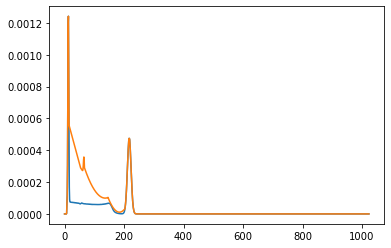

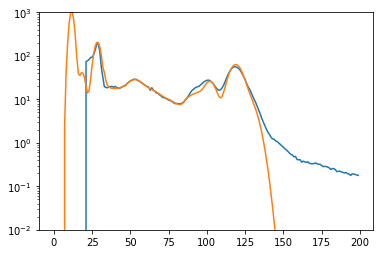

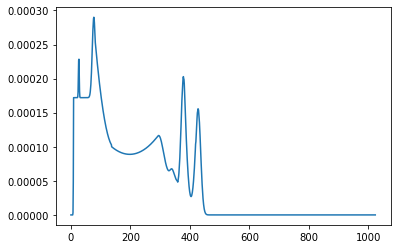

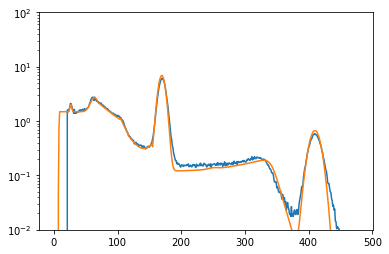

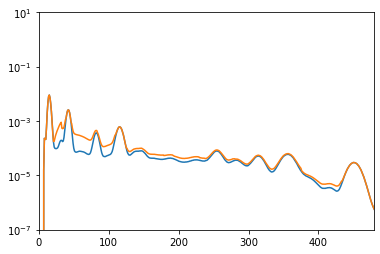

In [3]:
Co = np.loadtxt(dir+"resCo.txt")
Cs = np.loadtxt(dir+"resCs.txt")
Na = np.loadtxt(dir+"resNa.txt")
Ba = np.loadtxt(dir+"resBa.txt")
Eu = np.loadtxt(dir+"resEu.txt")

U235=np.loadtxt(dir+"resU235.txt")
U238=np.loadtxt(dir+"resU238.txt")
Th = np.loadtxt(dir+"resTh.txt")
Ra = np.loadtxt(dir+"resRa.txt")
K  = np.loadtxt(dir+"resK.txt")


###############################################
## Compton edge fitting
## Cs-137
###############################################
plt.plot(Cs)
ch = np.arange(1024)

X = ch[15:54]
m = -0.00483226978228295
c = 0.463047994313389
funcLinear = m*X + c

X = ch[54:67]
A = 0.07
B = 65.0764
Sigma = 1.58
m1= -0.00199462114328639
c1= 0.31
funcGauss = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + m1*X + c1

X = ch[67:146]
p1= 2.75786455226826e-05
q1= -0.0075301414126459
r1= 0.583456592607807
funcPoly1 = p1*X*X + q1*X + r1

X = ch[146:203]
p2= 4.41035e-05
q2= -0.0162693
r2= 1.50802
funcPoly2 = p2*X*X + q2*X + r2

Cs[15:54] = funcLinear/700
Cs[54:67] = funcGauss/700
Cs[67:146]= funcPoly1/700
Cs[146:203]=funcPoly2/700

np.savetxt(dir+'Cs-ComptonEdgefit.txt', Cs)

plt.plot(Cs)
plt.show()

###############################################
## Ba-133
###############################################

BaExp = np.loadtxt(dir+"Ba133_data_sum.csv_rem_BG.csv", delimiter=',')
plt.yscale("log")
plt.ylim((1e-2, 1000))
plt.plot(BaExp[:200])

X = ch[33:50]
#ComptonDiffBa = -3.4267e-7 * X * X + 0.000036723 * X - 0.000619777
#ComptonDiffBa = -1.8915e-7 * X * X + 0.0000197422 * X - 0.000176637
#ComptonDiffBa = -3.95765e-6 * X + 0.000508432
ComptonDiffBa = 1.36364e-6 * X * X - 0.000107364 * X + 0.00236582
Ba[33:50] += ComptonDiffBa

X = ch[50:86]
ComptonDiffBa2 = 3.7567e-7 * X * X - 0.0000617811 * X + 0.00267497
Ba[50:86] += ComptonDiffBa2

X = ch[86:93]
ComptonDiffBa3 = -7.0226e-7 * X * X + 0.000137086 * X - 0.00639702
Ba[86:93] = ComptonDiffBa3

X = ch[46:54]
A = 17.5
B = 53.55
Sigma = 6.2148
m1= -0.0756563770302553
c1= 15.1512660503501
funcGauss1 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + m1*X + c1
Ba[46:54] = funcGauss1/50000

np.savetxt(dir+'Ba-ComptonEdgefit.txt', Ba)

plt.plot(Ba[:200]*50000)
plt.show()

###############################################
## Co-60
###############################################
X = ch[9:82]
A = 0.3
B = 26.55
Sigma = 1.28622260795426
d  = 0.86
A1 = 0.59
B1 = 76.9796547661445
Sigma1 = 5.22865794880
funcGauss2 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + A1*np.exp((-(X-B1)**2)/(2*Sigma1**2)) + d
Co[9:82] = funcGauss2/5000

X = ch[82:137]
Poly1 = 0.000188314908045988 * X * X - 0.0549161877815528 * X + 4.50061786812904
Co[82:137] = Poly1/5000

X = ch[137:292]
Poly2 = 1.50499926937746e-05 * X * X - 0.00595277558578775 * X + 1.0329505637320
Co[137:292] = Poly2/5000

X = ch[292:359]
A = 0.065
B = 340
Sigma = 7
dd = -0.00130483903987569
ee = 0.711819904747457
A1 = 0.256
B1 = 296
Sigma1 = 15
funcGauss3 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + A1*np.exp((-(X-B1)**2)/(2*Sigma1**2)) + dd * X + ee
Co[292:359] = funcGauss3/5000

X = ch[384:420]
pp =  0.0016624285157812
qq = -1.34253956318541
rr = 271.185755248658
Poly3 = pp * X * X + qq * X + rr
Co[384:420] = Poly3/5000

np.savetxt(dir+'Co-ComptonEdgefit.txt', Co)

plt.plot(Co)
plt.show()

###############################################
## Na-22
###############################################

NaExp = np.loadtxt(dir+"Na22_data_sum.csv_rem_BG.csv", delimiter=',')
plt.yscale("log")
plt.ylim((1e-2, 100))
plt.plot(NaExp[:Datasize])

X = ch[9:69]
A = 1.26
B = 63.8203599955983
Sigma = 6
d  = 1.56
A1 = 0.571168936575289
B1 = 26.5813369461101
Sigma1 = 1.33444417051575
funcGauss3 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + A1*np.exp((-(X-B1)**2)/(2*Sigma1**2)) + d
Na[9:69] = funcGauss3 / 4200

X = ch[69:105]
Poly1 = 0.000418911418990103 * X * X - 0.106367639044028 * X + 7.6510123507193
Na[69:105] = Poly1/4200

X = ch[105:118]
Poly2 = 0.00135027597720696 * X * X - 0.34754137775294 * X + 22.7567960331933
Na[105:118] = Poly2/4200

X = ch[118:155]
Poly3 = 0.000412795336697596 * X * X - 0.116382701296672 * X + 8.53211650098415
Na[118:155] = Poly3/4200

np.savetxt(dir+'Na-ComptonEdgefit.txt', Na)

plt.plot(Na[:Datasize]*4000)
plt.show()

###############################################
## Eu-152
###############################################
plt.yscale("log")
plt.ylim((1e-7, 10))
plt.xlim((0, Datasize))
plt.plot(Eu)

X = ch[19:33]
ComptonDiffEu = 0.0000634888 * X - 0.00132484
Eu[19:33] += ComptonDiffEu

X = ch[33:39]
ComptonDiffEu = 2.46/7000  
Eu[33:39] += ComptonDiffEu

X = ch[47:82]
ComptonDiffEu = -0.00000568367 * X + 0.000551143
Eu[47:82] += ComptonDiffEu

X = ch[82:84]
ComptonDiffEu = 0.58873/7000
Eu[82:84] += ComptonDiffEu

X = ch[84:110]
ComptonDiffEu = 0.00000156 * X - 0.0000803657
Eu[84:110] += ComptonDiffEu

X = ch[110:111]
ComptonDiffEu = 0.25/7000  
Eu[110:111] += ComptonDiffEu

X = ch[111:112]
ComptonDiffEu = 0.2/7000  
Eu[111:112] += ComptonDiffEu

X = ch[126:148]
ComptonDiffEu = 0.14/7000  
Eu[126:148] += ComptonDiffEu

X = ch[148:149]
ComptonDiffEu = 0.13/7000  
Eu[148:149] += ComptonDiffEu

X = ch[149:179]
ComptonDiffEu = 0.12/7000  
Eu[149:179] += ComptonDiffEu

X = ch[179:192]
ComptonDiffEu = 0.10/7000  
Eu[179:192] += ComptonDiffEu

X = ch[192:193]
ComptonDiffEu = 0.09/7000  
Eu[192:193] += ComptonDiffEu

X = ch[193:230]
ComptonDiffEu = 0.08/7000  
Eu[193:230] += ComptonDiffEu

X = ch[230:238]
ComptonDiffEu = 0.065/7000  
Eu[230:238] += ComptonDiffEu

X = ch[238:279]
ComptonDiffEu = 0.05/7000  
Eu[238:279] += ComptonDiffEu

X = ch[279:281]
ComptonDiffEu = 0.04/7000  
Eu[279:281] += ComptonDiffEu

X = ch[281:376]
ComptonDiffEu = 0.025/7000  
Eu[281:376] += ComptonDiffEu

X = ch[376:434]
ComptonDiffEu = 0.01/7000  
Eu[376:434] += ComptonDiffEu

X = ch[434:437]
ComptonDiffEu = 0.005/7000  
Eu[434:437] += ComptonDiffEu

X = ch[437:442]
ComptonDiffEu = 0.0025/7000  
Eu[437:442] += ComptonDiffEu

np.savetxt(dir+'Eu-ComptonEdgefit.txt', Eu)
plt.plot(Eu)
plt.show()

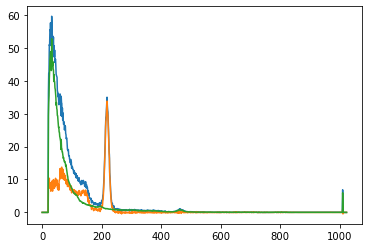

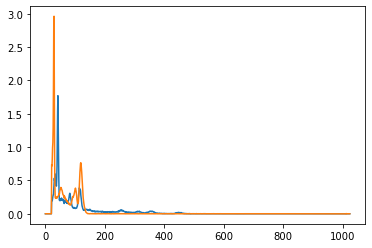

In [3]:
###################################################
## Using experimental data to train
###################################################

path0 = 'RItest/'
Co = np.loadtxt(path0+"Co_sum_.csv", delimiter = ',')
Cs = np.loadtxt(path0+"Cs_sum_.csv", delimiter = ',')
Na = np.loadtxt(path0+"Na_sum_.csv", delimiter = ',')
Ba = np.loadtxt(path0+"Ba_sum_.csv", delimiter = ',')
Eu = np.loadtxt(path0+"Eu_sum_.csv", delimiter = ',')
BG = np.loadtxt(path0+"BG_sum_.csv", delimiter = ',')

U235=np.loadtxt(dir+"resU235.txt")
U238=np.loadtxt(dir+"resU238.txt")
Th = np.loadtxt(dir+"resTh.txt")
Ra = np.loadtxt(dir+"resRa.txt")
K  = np.loadtxt(dir+"resK.txt")

BG_Bq =[]
Sumpeaks = []
PeaksNoU235 = []
BGCCR = []
BGccr = []

nuclides_n = 7
#bits = [bit1*5, bit2, bit3, bit4, bit5, bit6/2]

## Convert to cpm 
BG = BG/900
Co = Co/30
Cs = Cs/30
Na = Na/30
Ba = Ba/30
Eu = Eu/30
plt.plot(Cs)
## remove BG

Co = Co - BG
Cs = Cs - BG
Na = Na - BG
Ba = Ba - BG
Eu = Eu - BG

plt.plot(Cs)
plt.plot(BG)
plt.show()

## Considering distance factor, changing to 1 cm
Co = Co/((1/15)**2)
Cs = Cs/((1/7.5)**2)
Ba = Ba/((1/40.5)**2)
Na = Na/((1/32.5)**2)
Eu = Eu/((1/26)**2)

## Reduce to per 1 Bq
Co = Co/62286.55 
Cs = Cs/8295.054
Na = Na/41427.98
Eu = Eu/86785.66
Ba = Ba/666479.6

#plt.plot(Co)
plt.plot(Eu)
plt.plot(Ba)
plt.show()

# bits = [bit1*5, bit2, bit3, bit4, bit5, bit6/2]

In [4]:
###################################################
## Using experimental data to train
###################################################

Measurement_time = 30

for Eshift in Eshiftpatterns:  
   
    s1 = secrets.choice(range(-3,4))     # rolling about 
    randEshift.append(s1)
    
    tempCo = np.roll(Co, -s1)
    tempCs = np.roll(Cs, -s1)
    tempNa = np.roll(Na, -s1)    
    tempBa = np.roll(Ba, -s1)    
    tempEu = np.roll(Eu, -s1)
    tempU235=np.roll(U235, -s1)
    tempBG = np.roll(BG, -s1)
    
    for bit in bits:
        for i in range(pattern):
            
            x1 = rng.uniform((bit/10), (bit))
            x2 = rng.uniform((bit/10), (bit))
            x3 = rng.uniform((bit/10), (bit))
            x4 = rng.uniform((bit/10), (bit))
            x5 = rng.uniform((bit/10), (bit))
            x6 = rng.uniform((bit/10), (bit))            
            
            xsum = x1+x2+x3+x4+x5+x6
            
            xtot = rng.uniform((bit/10), (bit))
            x1 = x1/xsum * xtot
            x2 = x2/xsum * xtot
            x3 = x3/xsum * xtot
            x4 = x4/xsum * xtot
            x5 = x5/xsum * xtot
            x6 = x6/xsum * xtot           

            Co_Bq.append(x1)
            Cs_Bq.append(x2)
            Na_Bq.append(x3)            
            Ba_Bq.append(x4)            
            Eu_Bq.append(x5)
            U235_Bq.append(x6)            

            TotBq.append(xtot)

            co60 = np.round(Measurement_time *x1*tempCo[Startsize:Datasize])  
            cs137 = np.round(Measurement_time*x2*tempCs[Startsize:Datasize])
            na22 = np.round(Measurement_time *x3*tempNa[Startsize:Datasize])            
            ba133 = np.round(Measurement_time*x4*tempBa[Startsize:Datasize])
            eu152 = np.round(Measurement_time*x5*tempEu[Startsize:Datasize])
            u235 = np.round(Measurement_time *x6*tempU235[Startsize:Datasize])
            bg = np.round(Measurement_time*tempBG[Startsize:Datasize])
            s = np.sum(bg)
            random = s*np.random.normal(loc=0.0, scale=np.sqrt(s)/s)+s
            bg = bg*random/s


            ww = co60 + cs137 + na22  + ba133  + eu152 + u235 + bg
            uu = ww - u235
            
            Sumpeaks.append(ww)
            PeaksNoU235.append(uu)
            
            sumww = np.sum(ww,axis=0)
            sumuu = np.sum(uu,axis=0)
            
            CoCCR.append(np.sum(co60,axis=0)/sumww)
            CsCCR.append(np.sum(cs137,axis=0)/sumww)
            NaCCR.append(np.sum(na22,axis=0)/sumww)            
            BaCCR.append(np.sum(ba133,axis=0)/sumww)
            EuCCR.append(np.sum(eu152,axis=0)/sumww)
            U235CCR.append(np.sum(u235,axis=0)/sumww)
            BGCCR.append(np.sum(bg,axis=0)/sumww)
                        
            Coccr.append(np.sum(co60,axis=0)/sumuu)
            Csccr.append(np.sum(cs137,axis=0)/sumuu)
            Naccr.append(np.sum(na22,axis=0)/sumuu)            
            Baccr.append(np.sum(ba133,axis=0)/sumuu)
            Euccr.append(np.sum(eu152,axis=0)/sumuu)
            BGccr.append(np.sum(bg,axis=0)/sumuu)

Sums = np.vstack((Co[Startsize:Datasize], Sumpeaks))


In [5]:
###################################################
## Using experimental data to train
###################################################
X_train = np.array(Sumpeaks)

CCR_exp = np.vstack([CoCCR, CsCCR, NaCCR,  BaCCR, EuCCR, U235CCR, BGCCR])
Y_train = CCR_exp.T

ccr_no_U235 = np.vstack([Coccr, Csccr, Naccr,  Baccr, Euccr, BGccr])

Activity = np.vstack([TotBq, Co_Bq, Cs_Bq, Na_Bq,  Ba_Bq, Eu_Bq, U235_Bq])

nuclides_n = 7

print(X_train.shape)
print(np.shape(Y_train))

np.savetxt("YtrainCCR-7bitsexp.txt", CCR_exp.T)
np.savetxt('Activity-7bitsexp.txt', Activity.T)
save('X_train-7bitsexp.npy', X_train)
save('Y_train-7bitsexp.npy', Y_train)

(1433600, 460)
(1433600, 7)


In [4]:
## ==============================================##
###################################################
## Simulation
###################################################

Measurement_time = 10 ### 10 mins for exp data, 10 sec for sim  data
Factor_time = 60      ### To unify time step for both sim and exp data

for Eshift in Eshiftpatterns:  
   
    s1 = secrets.choice(range(-3,4))     # rolling about 
    randEshift.append(s1)
    
    tempCo = np.roll(Co, -s1)
    tempCs = np.roll(Cs, -s1)
    tempNa = np.roll(Na, -s1)    
    tempBa = np.roll(Ba, -s1)    
    tempEu = np.roll(Eu, -s1)
    tempU235=np.roll(U235, -s1)
    tempU238=np.roll(U238, -s1)
    tempTh = np.roll(Th, -s1)
    tempRa = np.roll(Ra, -s1)
    tempK  = np.roll(K, -s1)
    
    for bit in bits:
        for i in range(pattern):
            
            x1 = rng.uniform((bit/10), (bit))
            x2 = rng.uniform((bit/10), (bit))
            x3 = rng.uniform((bit/10), (bit))
            x4 = rng.uniform((bit/10), (bit))
            x5 = rng.uniform((bit/10), (bit))
            x6 = rng.uniform((bit/10), (bit))
            x7 = rng.uniform((bit/10), (bit))
            x8 = rng.uniform((bit/10), (bit))
            x9 = rng.uniform((bit/10), (bit))
            x10 = rng.uniform((bit/10), (bit))
            
            xsum = x1+x2+x3+x4+x5+x6+x7+x8+x9+x10
            
            #xtot = bit
            xtot = rng.uniform((bit/10), (bit))
            x1 = x1/xsum * xtot
            x2 = x2/xsum * xtot
            x3 = x3/xsum * xtot
            x4 = x4/xsum * xtot
            x5 = x5/xsum * xtot
            x6 = x6/xsum * xtot
            x7 = x7/xsum * xtot
            x8 = x8/xsum * xtot
            x9 = x9/xsum * xtot
            x10 = x10/xsum * xtot

            Co_Bq.append(x1)
            Cs_Bq.append(x2)
            Na_Bq.append(x3)            
            Ba_Bq.append(x4)            
            Eu_Bq.append(x5)
            U235_Bq.append(x6)
            U238_Bq.append(x7)
            Th_Bq.append(x8)
            Ra_Bq.append(x9)
            K_Bq.append(x10)
            TotBq.append(xtot)

            co60 = np.round(Measurement_time *x1*tempCo[Startsize:Datasize])  
            cs137 = np.round(Measurement_time*x2*tempCs[Startsize:Datasize])
            na22 = np.round(Measurement_time *x3*tempNa[Startsize:Datasize])            
            ba133 = np.round(Measurement_time*x4*tempBa[Startsize:Datasize])
            eu152 = np.round(Measurement_time*x5*tempEu[Startsize:Datasize])
            u235 = np.round(Factor_time*Measurement_time *x6*tempU235[Startsize:Datasize])
            u238 = np.round(Factor_time*Measurement_time *x7*tempU238[Startsize:Datasize])
            th232 = np.round(Factor_time*Measurement_time*x8*tempTh[Startsize:Datasize])
            ra226 = np.round(Factor_time*Measurement_time*x9*tempRa[Startsize:Datasize])
            k40 = np.round(Factor_time*Measurement_time  *x10*tempK[Startsize:Datasize])

            ww = co60 + cs137 + na22  + ba133  + eu152 + u235 + u238 + th232 + ra226 + k40
            uu = ww - u235
            
            Sumpeak.append(ww)
            PeakNoU235.append(uu)
            
            sumww = np.sum(ww,axis=0)
            sumuu = np.sum(uu,axis=0)
            
            CoCCR.append(np.sum(co60,axis=0)/sumww)
            CsCCR.append(np.sum(cs137,axis=0)/sumww)
            NaCCR.append(np.sum(na22,axis=0)/sumww)            
            BaCCR.append(np.sum(ba133,axis=0)/sumww)
            EuCCR.append(np.sum(eu152,axis=0)/sumww)
            U235CCR.append(np.sum(u235,axis=0)/sumww)
            U238CCR.append(np.sum(u238,axis=0)/sumww)
            ThCCR.append(np.sum(th232,axis=0)/sumww)
            RaCCR.append(np.sum(ra226,axis=0)/sumww)
            KCCR.append(np.sum(k40,axis=0)/sumww)
            
            
            Coccr.append(np.sum(co60,axis=0)/sumuu)
            Csccr.append(np.sum(cs137,axis=0)/sumuu)
            Naccr.append(np.sum(na22,axis=0)/sumuu)            
            Baccr.append(np.sum(ba133,axis=0)/sumuu)
            Euccr.append(np.sum(eu152,axis=0)/sumuu)
            U238ccr.append(np.sum(u238,axis=0)/sumuu)
            Thccr.append(np.sum(th232,axis=0)/sumuu)
            Raccr.append(np.sum(ra226,axis=0)/sumuu)
            Kccr.append(np.sum(k40,axis=0)/sumuu)
            
# Sum = np.vstack((Co[0,0:Datasize], Sumpeak))
Sum = np.vstack((Co[Startsize:Datasize], Sumpeak))


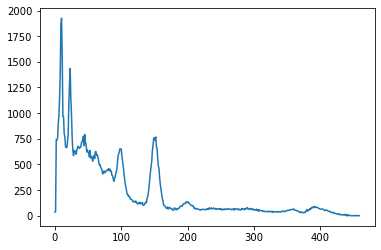

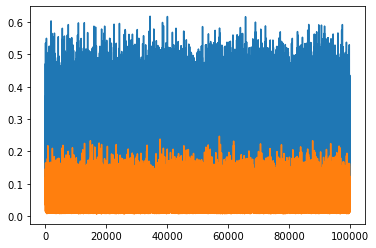

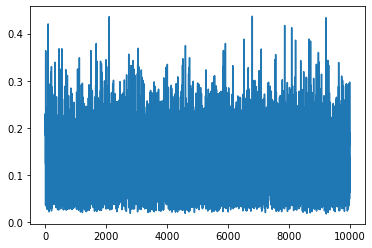

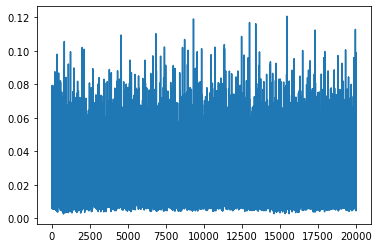

In [5]:
plt.plot(Sumpeak[0])
plt.show()
plt.plot(BaCCR[:100000])
#plt.plot(NaCCR[:100000])
plt.plot(CsCCR[:100000])
plt.show()
plt.plot(CoCCR[:10000])
plt.show()
bg4ccr = ThCCR + RaCCR + KCCR + U238CCR
plt.plot(bg4ccr[:20000])

In [6]:
nuclides_n = 10

X_train = np.array(Sumpeak)

CCR = np.vstack([CoCCR, CsCCR, NaCCR,  BaCCR, EuCCR, U235CCR, U238CCR, ThCCR, RaCCR, KCCR])

ccr_no_U235 = np.vstack([Coccr, Csccr, Naccr,  Baccr, Euccr, U238ccr, Thccr, Raccr, Kccr])

Activity = np.vstack([TotBq, Co_Bq, Cs_Bq, Na_Bq,  Ba_Bq, Eu_Bq, U235_Bq, U238_Bq, Th_Bq, Ra_Bq, K_Bq])

Y_train = CCR.T

print(X_train.shape)
print(np.shape(Y_train))

np.savetxt("YtrainCCR_Exp+SimBG.txt", CCR.T)
np.savetxt("X_train_Exp+SimBG.npy", X_train)
np.savetxt("Y_train_Exp+SimBG.npy", Y_train)


(1433600, 460)
(1433600, 10)


In [7]:
BgCCR = np.stack(U238CCR) + np.stack(KCCR) + np.stack(ThCCR) + np.stack(RaCCR)
print(BgCCR.shape)

CCR_acc_no_U235 = np.vstack([Coccr, Csccr, Naccr,  Baccr, Euccr, BgCCR])
CCR_acc = np.vstack([CoCCR, CsCCR, NaCCR,  BaCCR, EuCCR, U235CCR, BgCCR])

Y_train_acc = CCR_acc.T
Y_train_acc_no_U235 = CCR_acc_no_U235.T

np.savetxt("YtrainCCR_acc_Exp+SimBG.txt", CCR_acc.T)
np.savetxt("YtrainCCR_acc_no_U235_Exp+SimBG.txt", CCR_acc_no_U235.T)

(1433600,)


In [ ]:
# nuclides_n = 7
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
print(X_train.shape, np.shape(Y_train))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-4a697ab11922>", line 2, in <module>
    X_train = np.load('X_train.npy')
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\npyio.py", line 457, in load
    raise ValueError("Cannot load file containing pickled data "
ValueError: Cannot load file containing pickled data when allow_pickle=False

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

In [8]:
# VGG19 model定義
Ks.clear_session()

np.random.seed(10)

VGG19model = keras.models.Sequential()

VGG19model.add(layers.Conv1D(64, 3, activation = 'relu', padding='same',
                       input_shape = (Datasize-Startsize,1)))
VGG19model.add(layers.Conv1D(64, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))

VGG19model.add(layers.Conv1D(128, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(128, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))

VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
VGG19model.add(layers.Dense(1024, activation='relu'))
VGG19model.add(layers.Dense(1024, activation='relu'))
VGG19model.add(layers.Dropout(0.2))
VGG19model.add(layers.Dense(nuclides_n, activation='softmax'))

#opt= keras.optimizers.Adam(lr=0.0021533133440412807,
#                           decay=8.915893662822524e-09,
#                           amsgrad=True)
opt = keras.optimizers.Adam()

VGG19model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

VGG19model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 460, 64)           256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 460, 64)           12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 230, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 230, 128)          24704     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 230, 128)          49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 115, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 115, 256)         

In [9]:
print(X_train.shape)
print(Y_train.shape)

data_x = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # 学習データをConv1D Layer用に変形
print(data_x.shape)

data_y = Y_train

(1433600, 460)
(1433600, 10)
(1433600, 460, 1)


Train on 1146880 samples, validate on 286720 samples
Epoch 1/5
1146880/1146880 [==============================] - 780s 680us/step - loss: 2.5824 - accuracy: 0.8062 - val_loss: 1.9522 - val_accuracy: 0.9016
Epoch 2/5
1146880/1146880 [==============================] - 775s 676us/step - loss: 1.9521 - accuracy: 0.8951 - val_loss: 1.9494 - val_accuracy: 0.9314
Epoch 3/5
1146880/1146880 [==============================] - 774s 675us/step - loss: 1.9506 - accuracy: 0.9067 - val_loss: 1.9486 - val_accuracy: 0.9325
Epoch 4/5
1146880/1146880 [==============================] - 774s 675us/step - loss: 1.9496 - accuracy: 0.9130 - val_loss: 1.9475 - val_accuracy: 0.9355
Epoch 5/5
1146880/1146880 [==============================] - 775s 676us/step - loss: 1.9489 - accuracy: 0.9175 - val_loss: 1.9475 - val_accuracy: 0.9300


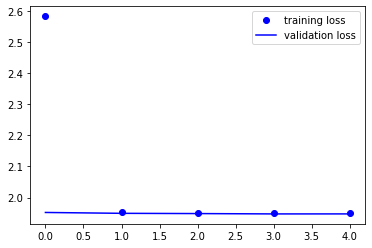

In [10]:
#VGG19 学習
from keras.callbacks import EarlyStopping

run = 5
val_split = 0.2
batch_size = 1024

VGGhistory = VGG19model.fit(data_x, data_y, 
                    epochs=run,
                            
                    batch_size=batch_size,
                    validation_split=val_split)
#                    callbacks=EarlyStopping(monitor='val_loss',patience=50, verbose=1, min_delta=0,mode="auto"))

VGGloss = VGGhistory.history['loss']
VGGval_loss = VGGhistory.history['val_loss']

#epochs= range(len(acc))
epochs= range(len(VGGloss))

plt.figure()
plt.plot(epochs, VGGloss, 'bo', label='training loss')
plt.plot(epochs, VGGval_loss, 'b', label='validation loss')

plt.legend()

plt.show()

In [ ]:
plt.savefig("loss-5epochs-7bits-Compton-Eu-fitted")
VGG19model.save("/VGG19-1D_5epoch-dropout0.2-7bits-Compton.h5")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 84
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-098259ce41b0>", line 2, in <module>
    VGG19model.save("/VGG19-1D_5epoch-dropout0.2-7bits-Compton.h5")
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\network.py", line 1152, in save
    save_model(self, filepath, overwrite, include_optimizer)
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\saving.py", line 449, in save_wrapper
    save_function(obj, filepath, overwrite, *args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\saving.py", line 540, in save_model
    with H5Dict(filepath, mode='w') as h5dict:
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages

<Figure size 432x288 with 0 Axes>

In [ ]:
VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch-dropout0.2.h5")

In [11]:
path0 = 'RItest/'
dirs = os.listdir(path0)
direc = dirs

obj_list = glob.glob(path0 + '/*.csv')
temp = [] 
Sum = []
ccr = []
x_test = []
filen = []
measure_t = 60 * 30

BG = np.sum(np.loadtxt(path0 + 'BG_sum_.csv'))/(60*900)
Cf = np.sum(np.loadtxt(path0 + 'Cf_sum_.csv'))/(60*2268)

for filename in obj_list:
    temp.append(np.loadtxt(filename, delimiter = ','))
    x_test.append(np.loadtxt(filename, delimiter = ','))
    a = np.stack(temp, axis = 0)
    Sum.append(np.sum(a))
    cps = np.sum(a)/measure_t
    ccr.append(cps/(BG + cps))
    temp = [] 

## correction of order from file naming order to CCR aranging order
x_test = np.stack(x_test, axis = 0)

direct = ['Co','Cs','Na','Ba','Eu','BG','CoCs', 'CoNa', 'CoBa', 'CoEu', 'CsNa', 'CsBa',
    'CsEu', 'BaNa','NaEu','BaEu','CoCsNa', 'CoCsBa', 'CoCsEu', 'CoBaNa', 'CoNaEu', 'CoBaEu', 
           'CsBaNa', 'CsNaEu','CsBaEu', 'BaNaEu', 'CoCsBaNa', 'CoCsNaEu', 'CoCsBaEu', 'CoBaNaEu', 'CsBaNaEu'] 


for j in range(len(direct)):
    x_test[j] = np.loadtxt(path0 + direct[j] + '_sum_.csv', delimiter = ',')
    if direct[j] == BG:
        x_test[j] = x_test[j]/(60*900)
    
print(x_test[11, 20:])
print(x_test[12, 20:])
print(x_test[13, 20:])

x_test = np.delete(x_test, len(x_test)-1,axis=0)

x_test = x_test[:, Startsize:Datasize]

"""
no	Co	Cs	Na	Ba	Eu	Bg
0	1					1
16		1				1
20			1			1
21				1		1
22					1	1
26						1
14	1	1				1
23	1		1			1
18	1			1		1
28	1				1	1
19		1	1			1
29		1		1		1
5		1			1	1
7			1	1		1
6			1		1	1
8				1	1	1
30	1	1	1			1
2	1	1		1		1
12	1	1			1	1
27	1		1	1		1
3	1		1		1	1
11	1			1	1	1
13		1	1	1		1
17		1	1		1	1
24		1		1	1	1
15			1	1	1	1
10	1	1	1	1		1
4	1	1	1		1	1
31	1	1		1	1	1
9	1		1	1	1	1
25		1	1	1	1	1

"""

#correction for Cs and BG
ccr[1] = Cf / (Cf + BG)
ccr[27-1] = BG / (BG)

print(ccr[31])

## convert data to cps
# x_test = x_test / measure_t


print(x_test.shape)
print(x_test[11, 20:50])

np.savetxt('x_test.txt', x_test)

X_test = np.loadtxt('x_test.txt')

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_test.shape)

y_test = np.loadtxt("y_test.txt", encoding = 'utf-8')
print(x_test.shape, y_test.shape)
print(y_test)


[    0.  9948. 10016. ...     0.     0.     0.]
[   0. 1964. 2046. ...    0.    0.    0.]
[    0. 10176. 10181. ...     0.     0.     0.]
0.6608530213522357
(31, 460)
[4439. 4636. 4474. 4541. 4442. 4640. 4746. 4856. 4741. 5258. 5342. 5450.
 5665. 5810. 5635. 5603. 5258. 5114. 4832. 4641. 4511. 4545. 4255. 4195.
 3809. 4344. 3962. 3889. 3486. 3690.]
(31, 460, 1)
(31, 460, 1) (31, 6)
[[0.7932012  0.         0.         0.         0.         0.2067988 ]
 [0.         0.6225573  0.         0.         0.         0.3774427 ]
 [0.         0.         0.660853   0.         0.         0.339147  ]
 [0.         0.         0.         0.8924209  0.         0.1075791 ]
 [0.         0.         0.         0.         0.7473434  0.2526566 ]
 [0.         0.         0.         0.         0.         1.        ]
 [0.45861286 0.35995002 0.         0.         0.         0.18143712]
 [0.45155988 0.         0.37621564 0.         0.         0.17222448]
 [0.43175549 0.         0.         0.48576279 0.         0.0824

In [12]:


y_test_U = np.loadtxt("y_test_U235.txt", encoding = 'utf-8')
print(y_test_U.shape)
print(y_test_U)

delta = load('U_test.npy')
dell = delta[1:,Startsize:Datasize] 
print(dell.shape)
print(x_test.shape)

dell = dell.reshape(dell.shape[0], dell.shape[1], 1)

x_test_U = np.row_stack((x_test, dell))
print(x_test_U.shape)

# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
# print(x_test.shape)
#print(x_test[0],x_test[1])

(40, 7)
[[0.7932012  0.         0.         0.         0.         0.
  0.2067988 ]
 [0.         0.6225573  0.         0.         0.         0.
  0.3774427 ]
 [0.         0.         0.660853   0.         0.         0.
  0.339147  ]
 [0.         0.         0.         0.8924209  0.         0.
  0.1075791 ]
 [0.         0.         0.         0.         0.7473434  0.
  0.2526566 ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.45861286 0.35995002 0.         0.         0.         0.
  0.18143712]
 [0.45155988 0.         0.37621564 0.         0.         0.
  0.17222448]
 [0.43175549 0.         0.         0.48576279 0.         0.
  0.08248172]
 [0.43962736 0.         0.         0.         0.41421093 0.
  0.14616171]
 [0.         0.34991591 0.37144048 0.         0.         0.
  0.27864361]
 [0.         0.36887912 0.         0.52877933 0.         0.
  0.10234155]
 [0.         0.35543697 0.         0.         0.42668117 0.
  0.21788186]
 [0.         0.         0.3838

(31, 10)
[0.60446507 0.03685236 0.03636947 0.0312542  0.11050607 0.05947008
 0.00633074 0.09384133 0.01893593 0.00197485]
(31, 9)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-11ace77040aa>", line 21, in <module>
    plt.bar(left+width, y_test[i], width=width, align='center')
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\pyplot.py", line 2409, in bar
    **({"data": data} if data is not None else {}), **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\__init__.py", line 1565, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\axes\_axes.py", line 2342, in bar
    np.atleast_1d(x), height, width, y, linewidth)
  File "<__array_function__ internals>", line 6, in broadcast_arrays
  File "C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\stride_tricks.py", line 264

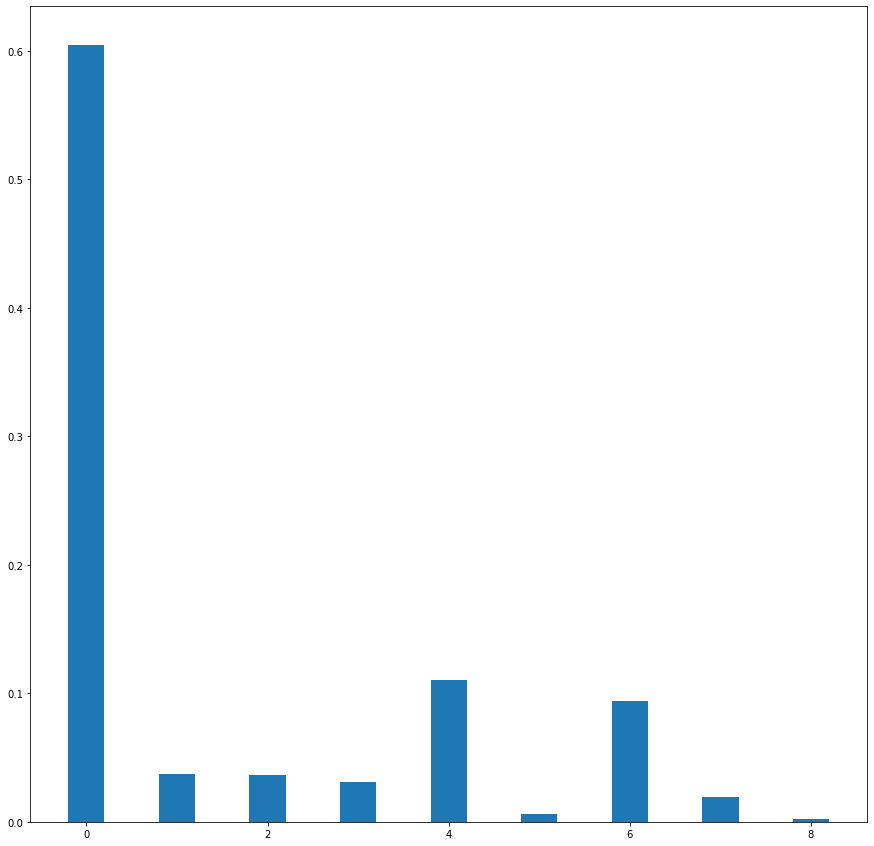

In [ ]:
## Use results from Experimental learning data

#VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch.h5")
result_y = VGG19model.predict(x_test)
print(result_y.shape)
print(result_y[0,:])

res_y = np.delete(result_y, 5, 1) # delete U-235 axis 1 (2nd axis) of 6th

print(res_y.shape)

names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "BG"])


left = np.arange(res_y.shape[1])
width = 0.4

for i in range(res_y.shape[0]):
    plt.figure(figsize=(15, 15))
    plt.bar(left, res_y[i], width=width, align='center')
    plt.bar(left+width, y_test[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    plt.savefig("ai-results/RI/" + "Aug5-5epoch-7bits-Compton-{:03}.png".format(i))

plt.show()

#np.savetxt("result_y-BGexp.csv",result_y,delimiter=',')


result_y = VGG19model.predict(x_test_U)
print(result_y.shape)
print(result_y[0,:])

names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "U235","BG"])
left = np.arange(result_y.shape[1])

for i in range(result_y.shape[0]):
    plt.figure(figsize=(15, 15))
    plt.bar(left, result_y[i], width=width, align='center')
    plt.bar(left+width, y_test_U[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    plt.savefig("ai-results/U/" +"Aug5-5epoch-7bits-U-Compton-{:03}.png".format(i))

plt.show()

#np.savetxt("result_y-U-BGexp.csv",result_y,delimiter=',')


In [13]:
score, acc = VGG19model.evaluate(x_test_U, y_test_U, 
                                batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

40/40 [==============================] - 2s 39ms/step
Test score: 1.3103824853897095
Test accuracy: 0.8500000238418579


In [14]:
############################################
## FPT calculation
############################################
# pathsu = "/home/ndgu-visitor2/project-AI/kimura_DNNexample/result_y/7bits-ComptonEdgeFitted-100epochs/"
# RI = np.loadtxt(pathsu+'result_y.csv', delimiter=',')
# print(RI.shape)
# print(RI[0,:])
# BG_ccr = RI[:, 6]+ RI[:, 7] + RI[:, 8] + RI[:, 9] #  238, Th, Ra, K
# BG_ccr = BG_ccr.reshape(BG_ccr.shape[0], 1)
# RI = np.hstack((RI[:, :5], BG_ccr))
# RI = RI.T
# print(RI.shape)

################################
RI = res_y.T
RI_exp = y_test.T
TP = []
FN = []
FP = []

for i in range(len(RI)-1):
    RI_detected = np.where(RI[i,:]>RI[5,:], 1, 0)
    RI_EXP = np.where(RI_exp[i,:]>RI_exp[5,:], 1, 0)
    RI_EXP_TP = np.where(RI_EXP == 1, 1, -1)
    RI_TP = np.where(RI_detected == RI_EXP_TP, 1, 0)
    TP.append(np.sum(RI_TP))
    FN.append(np.sum(np.where(RI_EXP>RI_detected, 1,0)))
    FP.append(np.sum(np.where(RI_detected>RI_EXP, 1,0)))

Tp = np.sum(np.stack(TP))
Fn = np.sum(np.stack(FN))
Fp = np.sum(np.stack(FP))

print(Tp, Fn, Fp)

precision = Tp/(Tp+Fp)
recall = Tp/(Tp+Fn)
F_score = 100*2*precision*recall/(precision + recall)

print(precision, recall, F_score)


48 27 3
0.9411764705882353 0.64 76.19047619047619


In [15]:
############################################
## FPT calculation for uranium
############################################
# RI = np.loadtxt(pathsu+'result_y_U.csv', delimiter=',')
# print(RI.shape)
# print(RI[0,:])
# BG_ccr = RI[:, 6]+ RI[:, 7] + RI[:, 8] + RI[:, 9] #  238, Th, Ra, K
# BG_ccr = BG_ccr.reshape(BG_ccr.shape[0], 1)
# RI = np.hstack((RI[:, :6], BG_ccr))
# RI = RI.T
# print(RI.shape)

################################
RI = result_y.T
RI_exp = y_test_U.T
TP = []
FN = []
FP = []

for i in range(len(RI)-1):
    RI_detected = np.where(RI[i,:]>RI[6,:], 1, 0)
    RI_EXP = np.where(RI_exp[i,:]>RI_exp[6,:], 1, 0)
    RI_EXP_TP = np.where(RI_EXP == 1, 1, -1)
    RI_TP = np.where(RI_detected == RI_EXP_TP, 1, 0)
    TP.append(np.sum(RI_TP))
    FN.append(np.sum(np.where(RI_EXP>RI_detected, 1,0)))
    FP.append(np.sum(np.where(RI_detected>RI_EXP, 1,0)))

Tp = np.sum(np.stack(TP))
Fn = np.sum(np.stack(FN))
Fp = np.sum(np.stack(FP))

print(Tp, Fn, Fp)

precision = Tp/(Tp+Fp)
recall = Tp/(Tp+Fn)
F_score = 100*2*precision*recall/(precision + recall)

print(precision, recall, F_score)


48 27 8
0.8571428571428571 0.64 73.2824427480916


In [25]:
############################################
## FPT calculation
############################################
# pathsu = "/home/ndgu-visitor2/project-AI/kimura_DNNexample/result_y/7bits-ComptonEdgeFitted-100epochs/"
# RI = np.loadtxt(pathsu+'result_y.csv', delimiter=',')
# print(RI.shape)
# print(RI[0,:])
# BG_ccr = RI[:, 6]+ RI[:, 7] + RI[:, 8] + RI[:, 9] #  238, Th, Ra, K
# BG_ccr = BG_ccr.reshape(BG_ccr.shape[0], 1)
# RI = np.hstack((RI[:, :5], BG_ccr))
# RI = RI.T
# print(RI.shape)

################################
RI = res_y.T
RI_exp = y_test.T
TP = []
FN = []
FP = []
prob = 0
print(RI.shape, RI_exp.shape)

for i in range(len(RI)-1):
    RI_detected = np.where(RI[i,:]>RI[5,:], 1, 0)
    RI_EXP = np.where(RI_exp[i,:]>RI_exp[5,:], 1, 0)
    RI_EXP_TP = np.where(RI_EXP == 1, 1, -1)
    RI_TP = np.where(RI_detected == RI_EXP_TP, 1, 0)
    TP.append(np.sum(RI_TP))
    FN.append(np.sum(np.where(RI_EXP>RI_detected, 1,0)))
    FP.append(np.sum(np.where(RI_detected>RI_EXP, 1,0)))
    
    prob0 = np.sum(np.where(((RI[i,:]-RI_exp[i,:]<0.2)&(RI[i,:]-RI_exp[i,:]>-0.2)),1,0))
    prob += prob0

PA = prob/((RI.shape[0]-1)*RI.shape[1])

Tp = np.sum(np.stack(TP))
Fn = np.sum(np.stack(FN))
Fp = np.sum(np.stack(FP))

print(Tp, Fn, Fp)

precision = Tp/(Tp+Fp)
recall = Tp/(Tp+Fn)
F_score = 100*2*precision*recall/(precision + recall)

print(precision, recall, F_score)
print(prob,PA)


(6, 31) (6, 31)
75 0 53
0.5859375 1.0 73.89162561576354
135 0.8709677419354839
